# Introduction

For the final project of CE 4981, I will be using the Airbnb price prediction dataset. This dataset is avilable at https:www.kaggle.com/stevezhenghp/airbnb-price-prediction and can be downloaded as a plain csv file. This dataset provides an abundance of data attributes, with a large number of samples, which can help predict price, ratings, and much more. After cleaning up the data, the dataset will provide a good means of performing both supervised and unsupervised learning opportunities.

# Hypothesis

<i>what problem(s) you are trying to solve, what questions are you trying to
answer.</i>

There are several hypothesis that can be drafted from the airbnb data. For this project, I am particularly interested in determining the sustance to three main hypothesis, with additional exploritory analysis to determine the validity of a few more smaller hypothesis.

The first, and likely the most common hypothesis that I wish to test, is that the price of a particular airbnb can be accurately predicted using a subset of the enitre dataset. Of all the possible attributes, I predict that location, beds, number of ammenities, and the number of people that the airbnb can accomodate will have the largest impact on the pricing of an airbnb. Further, I hypothesize that including other attributes may actually weaken the ability of the attributes to accurately predict the price of an airbnb; rather, they are likley just contributing noise. This hypothesis can likely be explored using a form of supervised linear regression. If the data model is accurate, it could be a powerful tool for airbnb hosts in setting prices.

Secondly, it's likely that groups of characteristics/attributes exist in which the pricing is similar. For example, houses in certain neighborhoods, with a certain amount of rooms, with the same type of housing category may be able to be grouped together in terms of pricing. This, again, could be a powerful tool for hosts to set prices, or for consumers to identify outliers in the cluster that the type of airbnb they are looking for belong (helping avoid overpriced airbnbs, or finding great deals).

While these hypotheses are great for identifying high level macro-level relationships in the airbnb data, they are several other smaller relationships worth exploring. These details may reveal hidden details or secrets that make an unporportionately large difference in the price or quality of an airbnb. These smaller hypothesis can be summarized in the following list.

* <strong>Geographical Data</strong> - I hypothesize that the geographical location of an airbnb (given by zipcode) has the highest, or close to the highest correlation to the price of an airbnb. Airbnbs in places such as California likely are much more expensive than Wisconsin, and a large portion of this is probably due to their location.

* <strong>Price and Rating</strong> - I hypothesize that paying a higher price for an airbnb would correlate to a higher satisfaction rating (as given by the number of stars rated). I have a feeling that I may be suprised on this one though.

* <strong>Host Qualities</strong> - I hypothesize that the more involved a host is in their airbnb, which can be derived by the length of the description and other host attributes, the higher the ratings will be on their airbnb. Similarly, the better a host is, the higher they are likely able to charge for their airbnb.

* <strong>Amenities</strong> - I hypothesize that the number of amenities that an airbnb has likely has a strong, positive correlation with the price and ratings of the airbnb. My prediction is this my correlate to the price almost as strongly as the geographical location of the airbnb.

* <strong>More if time permits...<strong>

# Dataset

<i>explanation of the dataset. This should include an explanation of why the
dataset was created, who created it, and an explanation of features, target variables, etc. It
is important to provide appropriate references.</i>

The dataset, which is shown in the next cell, consists of various attributes regarding airbnb. The target variable of this dataset its price, which is shown as a logarithm in the raw data. The dataset was downloaded from https://www.kaggle.com/stevezhenghp/airbnb-price-prediction, and the author, Steve Zheng provides several this dataset free of charge, but with very little explaination of the features. As a result, the meaning of the features are largely up to interpretation, but I have done my best in the list below to provide a brief explanation for each feature.
* id - This field simply provides an identification number for each instance. This is likely not useful for any data exploration.
* log_price - This is the log of the price for the particular airbnb.
* property_type - this categorical field indicates the type of property that the airbnb is (such as a house, apartment, cave, etc.)
* room_type - This field indicated whether the airbnb is the whole entire property, or just a subset.
* Amenities - This field describes what amenities are included with the airbnb (such as TV, air conditioning, etc.)
* accommodates - This field describes how many people can stay in the airbnb at a single time.
* bathrooms - This field indicates how many bathrooms are in the airbnb. This can be a faction due to bathrooms which only have a toilet and not a shower/bathtub.
* This field indicated whether the airbnb has a bed, or rather, has an alternative such as a futon.
* cancellation_policy - This is a categorical attribute which indicates whether an airbnb host's cancellation policy is strict, moderate or flexible. Flexible options are often more attractive to renters.
* cleaning_fee - This field indicates whether a cleaning fee is charged (True) or not (False)
* city - This field contains a string representing the city that the airbnb is located in. This is represented by an acronym in some cases, and in others, it is the entire name of the city.
* description - This is a field that described what the airbnb is like. This makes it easier for the buyer to get an idea how they will like the airbnb prior to purchase.
* first_review - This field indicates the date of the airbnb's first review
* host_has_profile_pic - This indicates whether or not a host has a profile picture for their account (t - yes, f - no)
* host_identity_verified - This indicates whether or not a host's identify has been verified or not (t - yes, f - no)
* host_response_rate - This field indicates how often a host responds to a potential buyers message.
* host_since - This field is a date which indicates the day that the host became registered to host an airbnb.
* instant_bookable - This indicates whether a airbnb can be booked without any waiting (t) or not (f).
* last_review - This field indicates the most recent date that an airbnb was reviewed.
* latitude - The latitude, in degrees, that the airbnb is located at.
* longitude - The longitude, in degrees, that the airbnb is located at.
* name - This is a string that represents the name of the airbnb. This is often the first impression of an airbnb for a customer.
* neighbourhood - This is a string representation of the name of the neighbourhood that the airbnb is located at.
* number_of_reviews - The total number of customers that have reviewed the airbnb. This field can be represented by an integer.
* review_scores_rating - This field indicates the average of all the reviews for the airbnb. If there are no ratings for the airbnb, it is blank.
* thumbnail_url - This field contains a hyperlink to an image of the airbnb being rented. This field is left blank if no thumbnail image exists.
* zipcode - This field represents the zipcode that the airbnb is located at. The zipcodes are often represented in different formats for this dataset.
* bedrooms - This is an integer value indicating how many bedrooms the airbnb has.
* beds - This is an integer value indicating how many beds are available in the airbnb.

In [1]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv('./data/train.csv')
raw_data.head(n=10)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
5,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0
6,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,33.980454,-118.462821,Beach Town Studio and Parking!!!11h,NaN,15,97.0,https://a0.muscache.com/im/pictures/4c920c60-4...,90292,1.0,1.0
7,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,34.046737,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0
8,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,37.781128,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0
9,5385260,3.583519,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,33.992563,-117.895997,No.7 Queen Size Cozy Room 舒适大床房,NaN,2,90.0,https://a0.muscache.com/im/pictures/8d2f08ce-b...,91748,1.0,1.0


In [2]:
raw_data.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


# Data Preprocessing

<i>identification of required features, proper handling of missing
values (removal, imputation, etc.), and supporting documentation for your decisions such
as the number of missing values relative to the size of the dataset.</i>

## Attribute Reduction

There are a few data attributes that will not be needed in the analysis of the data, so a new table will be constructed with copies of the attributes that will be helpful for data analysis.

In [3]:
modified_data = raw_data.copy()
modified_data.drop(['id', 'neighbourhood', 'name', 'first_review', 'last_review'], axis=1, inplace=True)
modified_data.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,host_since,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,2012-03-26,f,40.696524,-73.991617,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,2017-06-19,t,40.766115,-73.989040,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,2016-10-25,t,40.808110,-73.943756,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,2015-04-19,f,37.772004,-122.431619,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,2015-03-01,t,38.925627,-77.034596,4,40.0,NaN,20009,0.0,1.0


<p>In total, 3 columns were dropped because they either could be represented through other attributes, or they don't add much clarity or value to the dataset. In summary, the following attributes were removed, with their respective reason:</p>

* <strong>id</strong> - ID does not provide any analytical value to the dataset and is merely a means for tracking instances, likely for an application. There is no need to keep track of particular instances for this dataset.
* <strong>latitude</strong> - This attribute can be adequetly represented by the zipcode attribute.
* <strong>longitude</strong> - This attribute can be adequetly represented by the zipcode attribute.

    *Note: If a zipcode is not present, it can be calculated using online tools by using longitude and latitude as a parameter.*

* <strong>neighbourhood</strong> - The reasoning for this is similar to the reasoning for latitude and longitude; zipcode can adequetly represent the geographical location of the airbnb.


## Datatypes

A quick look at the datatype of each attribute should be performed to help identify any columns that are typed incorrectly. An incorrect type often is a hint that there are data values that need to be cleaned up.

In [4]:
modified_data.dtypes

log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
latitude                  float64
longitude                 float64
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

## Handle Missing Values

### log_price

In [5]:
print(np.dtype(modified_data.property_type))
print('Null Values: ', modified_data.log_price.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.log_price.unique()))

object
Null Values:  False
Number of Unique Values:  767


### property_type

Property type was an Object, but it should be converted into a category data type.

In [6]:
modified_data.property_type = modified_data.property_type.astype('category')

In [7]:
print('Data Type: ', modified_data.property_type.dtype)
print('Null Values: ', modified_data.property_type.isnull().values.any())
print('Number of N/A values', modified_data[modified_data.property_type == "N/A"]["property_type"].count())
print('Number of Unique Values: ', np.size(modified_data.property_type.unique()))
modified_data.property_type.unique()

Data Type:  category
Null Values:  False
Number of N/A values 0
Number of Unique Values:  35


[Apartment, House, Condominium, Loft, Townhouse, ..., Parking Space, Train, Cave, Lighthouse, Island]
Length: 35
Categories (35, object): [Apartment, House, Condominium, Loft, ..., Train, Cave, Lighthouse, Island]

### room_type

In [8]:
modified_data.room_type = modified_data.room_type.astype('category')

In [9]:
print('Data Type: ', modified_data.room_type.dtype)
print('Null Values: ', modified_data.room_type.isnull().values.any())
print('Number of N/A values', modified_data[modified_data.room_type == "N/A"]["property_type"].count())
print('Number of Unique Values: ', np.size(modified_data.room_type.unique()))
modified_data.room_type.unique()

Data Type:  category
Null Values:  False
Number of N/A values 0
Number of Unique Values:  3


[Entire home/apt, Private room, Shared room]
Categories (3, object): [Entire home/apt, Private room, Shared room]

### amenities

amenities is loaded into the dataset as a list with a format the looks similar to JSON (note that it is not valid JSON). For the previous hypothesis made, only the number of amenities is needed. As a result, a new column should be made to keep track of the number of amenities. The amenities column will be kept for reference, but will not be included in the data model, or any data processing after this step.

In [10]:
modified_data["amenities"] = modified_data["amenities"].astype('str')
modified_data["amenities_count"] = modified_data["amenities"].str.split(',')
modified_data["amenities_count"] = modified_data["amenities_count"].str.len()
modified_data.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,amenities_count
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,f,40.696524,-73.991617,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,9
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,t,40.766115,-73.989040,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,15
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,t,40.808110,-73.943756,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,19
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,f,37.772004,-122.431619,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,15
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,t,38.925627,-77.034596,4,40.0,NaN,20009,0.0,1.0,12


### accommodates                

Accommodates was already the expected datatype, so there is no need to convert it.

In [11]:
print('Data Type: ', modified_data.accommodates.dtype)
print('Null Values: ', modified_data.accommodates.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.accommodates.unique()))
modified_data.accommodates.unique()

Data Type:  int64
Null Values:  False
Number of Unique Values:  16


array([ 3,  7,  5,  4,  2,  6,  8,  1,  9, 10, 16, 11, 12, 14, 13, 15],
      dtype=int64)

### bathrooms

In [12]:
print('Data Type: ', modified_data.bathrooms.dtype)
print('Null Values: ', modified_data.bathrooms.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.bathrooms.unique()))
modified_data.bathrooms.unique()

Data Type:  float64
Null Values:  True
Number of Unique Values:  18


array([1. , 1.5, 2. , nan, 2.5, 3. , 0.5, 4.5, 5. , 0. , 4. , 3.5, 5.5,
       7.5, 6. , 8. , 7. , 6.5])

Here, it is evident that float64 is the correct datatype for bathrooms, because some bathrooms are considered half-bathrooms, which makes it possible to have a fractual amount of bathrooms.

What is evident however, is there are some values with no value. To check the extent to which this is occuring, it would be helpful to get the total number of instances with nan.

In [13]:
 modified_data[modified_data.bathrooms.isnull() == True]["bathrooms"].shape

(200,)

As can be seen, there are 200 rows of data with the number of bathrooms not specified. Since that is such a small amount of samples relative to the total size of the dataset (74,111 => 2.7%), these samples will be dropped from the dataset. 

In [14]:
i = modified_data[modified_data.bathrooms.isnull() == True].index
modified_data.drop(i, inplace=True)

At this point, the instances with no bathroom information have been dropped.

### bed_type

Bed type should be converted to a proper category type.

In [15]:
modified_data.bed_type = modified_data.bed_type.astype('category')

In [16]:
print('Data Type: ', modified_data.bed_type.dtype)
print('Null Values: ', modified_data.bed_type.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.bed_type.unique()))
modified_data.bed_type.unique()

Data Type:  category
Null Values:  False
Number of Unique Values:  5


[Real Bed, Futon, Pull-out Sofa, Couch, Airbed]
Categories (5, object): [Real Bed, Futon, Pull-out Sofa, Couch, Airbed]

### cancellation_policy

cancellation policy is also a categorical data type and should be converted to the proper type.

In [17]:
modified_data.cancellation_policy = modified_data.cancellation_policy.astype('category')

In [18]:
print('Data Type: ', modified_data.cancellation_policy.dtype)
print('Null Values: ', modified_data.cancellation_policy.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.cancellation_policy.unique()))
modified_data.cancellation_policy.unique()

Data Type:  category
Null Values:  False
Number of Unique Values:  5


[strict, moderate, flexible, super_strict_30, super_strict_60]
Categories (5, object): [strict, moderate, flexible, super_strict_30, super_strict_60]

### cleaning_fee

The cleaning fee is a boolean value, and be kept as such; either a cleaning fee is charged, or it is not.

In [19]:
print('Data Type: ', modified_data.cleaning_fee.dtype)
print('Null Values: ', modified_data.cleaning_fee.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.cleaning_fee.unique()))
modified_data.cleaning_fee.unique()

Data Type:  bool
Null Values:  False
Number of Unique Values:  2


array([ True, False])

### city

The city variable could be made a category or a string. The right choice depends on the number of avilable choices. If nearly every city field is unique, then it makes more sense to make the variable a string. If many instances share a common city, then it makes sense to make the city variable a category. Before choosing the right datatype, the data should be explored a little more.

In [20]:
print('Data Type: ', modified_data.city.dtype)
print('Null Values: ', modified_data.city.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.city.unique()))
modified_data.city.unique()

Data Type:  object
Null Values:  False
Number of Unique Values:  6


array(['NYC', 'SF', 'DC', 'LA', 'Chicago', 'Boston'], dtype=object)

Some of the cities are classified by their acutal name, and some are classified by their abbreviation. Since there is no overlap, this shouldn't be an issue.

Additionally, since there are only 6 unique values, a datatype of category is appropriate for the city column.

In [21]:
modified_data.city = modified_data.city.astype('category')

### description

The description is originally stored as a string, however, the actual context of the string is not important for this project. Instead, the length of the description strings are desired. A new column in the dataframe should be created with the length of each string.

Prior to doing this however, the attribute should be checked for any missing values. If there are missing values, then that likely means that the host provided no description of the airbnb, which is actually useful data. If that occurs, a string length of 0 should be choosen.

In [22]:
print('Data Type: ', modified_data.description.dtype)
print('Null Values: ', modified_data.description.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.description.unique()))
print('Number of Descriptions with length 0: ', modified_data[modified_data.description.str.len() == 0].size)

Data Type:  object
Null Values:  False
Number of Unique Values:  73288
Number of Descriptions with length 0:  0


Now the length of each string can be added to a new column: description_length. The original description will be kept for reference.

In [23]:
modified_data["description_length"] = modified_data["description"].str.len()
modified_data.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,amenities_count,description_length
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,40.696524,-73.991617,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,9,211
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,40.766115,-73.989040,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,15,1000
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,40.808110,-73.943756,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,19,1000
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,37.772004,-122.431619,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,15,468
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,38.925627,-77.034596,4,40.0,NaN,20009,0.0,1.0,12,699


### host_has_profile_pic

Prior to deciding what dataype this column should be, the data should be explored a little to discover any oddities or unexpected values.

In [24]:
print('Data Type: ', modified_data.host_has_profile_pic.dtype)
print('Null Values: ', modified_data.host_has_profile_pic.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.host_has_profile_pic.unique()))
modified_data.host_has_profile_pic.unique()

Data Type:  object
Null Values:  True
Number of Unique Values:  3


array(['t', nan, 'f'], dtype=object)

One would expect the question "Does the host have a profile picture" to be a binary yes or no question. Some of the instances don't specify whether the host has a profile picture or not. Do determine what should be done with these instances, the number of undefined fields should be investigated.

In [25]:
modified_data[modified_data.host_has_profile_pic.isnull() == True]["host_has_profile_pic"].shape

(187,)

Since the number of null values is so small relative to the total size of the dataframe, it is appropriate to drop the instances in which there is no information regarding whether the host has a porfile picture. Further, it is not very likely that this data can be recovered using the other attributes.

In [26]:
i = modified_data[modified_data.host_has_profile_pic.isnull() == True].index
modified_data.drop(i, inplace=True)

Further, the values for this column are string representations of a boolean value. To analyze the data more effectively, these values should be converted to their actual boolean equivalents.

In [27]:
bool_equivalent = modified_data.host_has_profile_pic.str.match('t')
modified_data.host_has_profile_pic.unique()
modified_data.host_has_profile_pic = bool_equivalent

In [28]:
print('Data type for host_profile_pic: ', modified_data.host_has_profile_pic.dtype)
print(modified_data.host_has_profile_pic.unique())
modified_data.host_has_profile_pic.head()

Data type for host_profile_pic:  bool
[ True False]


0    True
1    True
2    True
3    True
4    True
Name: host_has_profile_pic, dtype: bool

At this point, all values for host_has_profile_pic have been reduced to a simple boolean value, which will be easier to use for data analysis.

### host_identity_verified 

The pre-processing procedure for this data attribute will be similar to the last. All null values need to be handled, and the values of the Series should be converted to boolean equivalents.

In [29]:
print('Data Type: ', modified_data.host_identity_verified.dtype)
print('Null Values: ', modified_data.host_identity_verified.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.host_identity_verified.unique()))
modified_data.host_identity_verified.unique()

Data Type:  object
Null Values:  False
Number of Unique Values:  2


array(['t', 'f'], dtype=object)

In this case, there are no null values, so the values need to be simply converted over to boolean equivalents.

In [30]:
bool_equivalent = modified_data.host_identity_verified.str.match('t')
modified_data.host_identity_verified.unique()
modified_data.host_identity_verified = bool_equivalent

print('Data type for host_identity_verified: ', modified_data.host_identity_verified.dtype)
print(modified_data.host_identity_verified.unique())
modified_data.host_identity_verified.head()

Data type for host_identity_verified:  bool
[ True False]


0     True
1    False
2     True
3     True
4     True
Name: host_identity_verified, dtype: bool

### host_response_rate

In [31]:
print('Data Type: ', modified_data.host_response_rate.dtype)
print('Null Values: ', modified_data.host_response_rate.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.host_response_rate.unique()))
modified_data.host_response_rate.unique()

Data Type:  object
Null Values:  True
Number of Unique Values:  81


array([nan, '100%', '71%', '68%', '67%', '83%', '50%', '90%', '86%',
       '92%', '82%', '80%', '89%', '93%', '99%', '0%', '88%', '96%',
       '70%', '94%', '91%', '25%', '95%', '98%', '62%', '29%', '33%',
       '81%', '63%', '38%', '60%', '79%', '75%', '65%', '97%', '87%',
       '40%', '54%', '78%', '53%', '58%', '76%', '30%', '64%', '17%',
       '20%', '77%', '73%', '41%', '59%', '57%', '85%', '56%', '42%',
       '44%', '35%', '14%', '74%', '27%', '10%', '84%', '6%', '72%',
       '55%', '43%', '13%', '36%', '39%', '46%', '26%', '61%', '52%',
       '23%', '22%', '69%', '66%', '15%', '11%', '31%', '21%', '47%'],
      dtype=object)

For this Series, there is two issues.
1. There are null values.
2. The numbers are strings rather than numerical data.

Both need to be addressed. First, the null values will be investigated.

In [32]:
modified_data[modified_data.host_response_rate.isnull() == True]["host_response_rate"].shape

(18051,)

In [33]:
modified_data.shape

(73724, 26)

In this case, a significant number of rows have no information regarding host response rate. This is a problem because dropping these rows would likely hurt the validity of any data analysis done, becuase a significant amount of data would be lost. The amount of missing values is not high enough to justify dropping the entire column however. Since pandas methods and functions can properly handle calculations with nan values, the attributes will be kept as nan.

It would be more useful to work with numerical data however; the strings should be converted to integers.

In [34]:
modified_data.host_response_rate = modified_data.host_response_rate.str.strip('%')
modified_data.host_response_rate = modified_data.host_response_rate.astype('float')
modified_data.host_response_rate = modified_data.host_response_rate / 100

In [35]:
modified_data.host_response_rate.head()

0    NaN
1    1.0
2    1.0
3    NaN
4    1.0
Name: host_response_rate, dtype: float64

### host_since

Before making any changes to this attribute, the nature of it's data type, values, and missing value count should be explored.

In [36]:
print('Data Type: ', modified_data.host_since.dtype)
print('Null Values: ', modified_data.host_since.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.host_since.unique()))
modified_data.host_since.unique()

Data Type:  object
Null Values:  False
Number of Unique Values:  3083


array(['2012-03-26', '2017-06-19', '2016-10-25', ..., '2008-03-03',
       '2010-04-30', '2009-08-23'], dtype=object)

Luckily this attribute has no null values. The data is, however, difficult to use becuase it is simply a string. Knowing the number of days that a host has hosted an airbnb would be a much more useful piece of data, which can be derived from these dates. A new column should be added to the dataframe, using host_since to determine the amount of days that a person has hosted an airbnb.

There is no timestamp for when the data was collected, so the number of days between now and the date will be calculated.

In [37]:
modified_data.host_since = pd.to_datetime(modified_data.host_since, format='%Y-%m-%d')
modified_data.host_since.head()

0   2012-03-26
1   2017-06-19
2   2016-10-25
3   2015-04-19
4   2015-03-01
Name: host_since, dtype: datetime64[ns]

In [38]:
from datetime import datetime
now = datetime.now()
delta_days = (now - modified_data.host_since)
delta_days.dt.days.head()

0    2412
1     501
2     738
3    1293
4    1342
Name: host_since, dtype: int64

In [39]:
modified_data["days_hosted"] = delta_days.dt.days
modified_data.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,amenities_count,description_length,days_hosted
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,-73.991617,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,9,211,2412
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,-73.989040,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,15,1000,501
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,-73.943756,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,19,1000,738
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,-122.431619,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,15,468,1293
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,-77.034596,4,40.0,NaN,20009,0.0,1.0,12,699,1342


Now the dataset has a column which corresponds to the number of days that a person has hosted an airbnb rather than a date value

### instant_bookable

instant_bookable would be expected to be a boolean value, however, the field needs to be explored to ensure that the data is in a good state for analysis, and be manipulated if it is not.

In [40]:
print('Data Type: ', modified_data.instant_bookable.dtype)
print('Null Values: ', modified_data.instant_bookable.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.instant_bookable.unique()))
modified_data.instant_bookable.unique()

Data Type:  object
Null Values:  False
Number of Unique Values:  2


array(['f', 't'], dtype=object)

Since there are no null values, the data simply needs to be converted to a correct boolean value.

In [41]:
bool_equivalent = modified_data.instant_bookable.str.match('t')
modified_data.instant_bookable = bool_equivalent

print('Data type for instant_bookable: ', modified_data.instant_bookable.dtype)
print(modified_data.instant_bookable.unique())
modified_data.instant_bookable.head()

Data type for instant_bookable:  bool
[False  True]


0    False
1     True
2     True
3    False
4     True
Name: instant_bookable, dtype: bool

### number_of_reviews

On the surface, the datatype for this field appears to be correct. The field should be investigated further to identify any missing values and handle them appropriately if needed.

In [42]:
print('Data Type: ', modified_data.number_of_reviews.dtype)
print('Null Values: ', modified_data.number_of_reviews.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.number_of_reviews.unique()))
modified_data.number_of_reviews.unique()

Data Type:  int64
Null Values:  False
Number of Unique Values:  371


array([  2,   6,  10,   0,   4,   3,  15,   9, 159,  82,  29,  13,  12,
        26,   5,  57,  73,  14,   1,  40, 248,  17, 138,  11,  44,  34,
        85,  18,  31,  30,  19,  25,  22,  23,  28,   7,  32, 144,  16,
        38, 105,  59,  67,  21, 120,   8,  61,  87, 206,  43, 104,  47,
        63, 186,  36,  27, 167,  48, 102,  51, 126,  81,  58,  72,  68,
       107,  79,  98,  39, 187, 123,  70,  78,  55,  54,  52,  42,  75,
       128,  60,  90, 254, 135,  64,  99, 191,  24,  66, 139, 125, 129,
        74, 318,  33,  35,  37,  20,  46,  83,  45,  41,  49, 289, 190,
        62,  88, 127, 154, 118, 216, 136,  69, 314, 112,  77,  56, 181,
        53, 117, 101, 106, 255, 114, 110, 192,  76, 113,  91, 182,  84,
       146, 119,  86,  50,  71, 157,  95,  94, 158, 142,  97, 194, 173,
       122, 132, 171, 111, 161, 208, 131, 384, 133, 116, 134, 148,  89,
       156, 179, 150, 147, 145, 202, 258, 178, 200, 155, 163, 149, 267,
       100,  65, 207, 172, 121, 180,  80,  92, 263, 193, 251, 19

Since there are no missing values, and the datatype has already been correctly assigned, no further action is required.

### review_scores_rating

Similar to the previous field, on the surface, the datatype for this field appears to be correct. The field should be investigated further to identify any missing values and handle them appropriately if needed.

In [43]:
print('Data Type: ', modified_data.review_scores_rating.dtype)
print('Null Values: ', modified_data.review_scores_rating.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.review_scores_rating.unique()))
modified_data.review_scores_rating.unique()

Data Type:  float64
Null Values:  True
Number of Unique Values:  55


array([100.,  93.,  92.,  nan,  40.,  97.,  99.,  90.,  89.,  91.,  88.,
        86.,  72.,  98.,  95.,  96.,  84.,  80.,  94.,  87.,  85.,  70.,
        60.,  75.,  20.,  76.,  83.,  82.,  78.,  73.,  55.,  81.,  67.,
        71.,  77.,  79.,  47.,  74.,  68.,  66.,  63.,  50.,  53.,  65.,
        64.,  27.,  69.,  30.,  58.,  35.,  62.,  49.,  57.,  54.,  56.])

It appears that there are null values in the Series; they should be investigated further to identify the extent to which they will impact any data analysis.

In [44]:
modified_data[modified_data.review_scores_rating.isnull() == True]["review_scores_rating"].shape

(16634,)

Similar to the host response field, there is a significant amount of null values in this field, but not enough to justify dropping the entire column. Additionally, it would not be appropriate to fill in a value into these fields. As a result, the null values will be left as they are. Pandas will be able to handle these values without breaking.

### thumbnail_url

The thumbail_url field may provide insights into the dedication of a host. For the purpose of this project, all that is needed is an indication of whether the field is present or not. As a result, the value of the field should be converted to True is a url exitst, and false if none exists.

In [45]:
print('Data Type: ', modified_data.thumbnail_url.dtype)
print('Null Values: ', modified_data.thumbnail_url.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.thumbnail_url.unique()))
modified_data.thumbnail_url.unique()

Data Type:  object
Null Values:  True
Number of Unique Values:  65558


array(['https://a0.muscache.com/im/pictures/6d7cbbf7-c034-459c-bc82-6522c957627c.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/348a55fe-4b65-452a-b48a-bfecb3b58a66.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/6fae5362-9e3a-4fa9-aa54-bbd5ea26538d.jpg?aki_policy=small',
       ...,
       'https://a0.muscache.com/im/pictures/7fbe448c-5293-4a22-a83e-54c8bc1bbf0d.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/b3971b63-06d9-4417-86ca-e6b40c22edca.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/22968537/da0156bc_original.jpg?aki_policy=small'],
      dtype=object)

In [46]:
bool_equivalent = ~(modified_data.thumbnail_url.isnull())
bool_equivalent
modified_data.thumbnail_url = bool_equivalent

print('Data type for thumbnail_url: ', modified_data.thumbnail_url.dtype)
print(modified_data.thumbnail_url.unique())
modified_data.thumbnail_url.head()

Data type for thumbnail_url:  bool
[ True False]


0     True
1     True
2     True
3     True
4    False
Name: thumbnail_url, dtype: bool

The thumbnail_url now represents the presence of a thumbnail_url

### zipcode

Zipcode will be an important attribute for building the data model in the project. As a result, the integrity of this field should be checked, and fixed if needed.

In [47]:
print('Data Type: ', modified_data.zipcode.dtype)
print('Null Values: ', modified_data.zipcode.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.zipcode.unique()))
modified_data.zipcode.unique()

Data Type:  object
Null Values:  True
Number of Unique Values:  770


array(['11201', '10019', '10027', '94117.0', '20009', '94131', '90292',
       '90015', '94121', '91748', '10009.0', '90254', '90277', '90804',
       '60622', '02127', '10002', '11226.0', '91401', '11212.0',
       '11411.0', nan, '11374', '90028', '10016', '11225', '90036',
       '90291', '90026', '11212', '94118', '11211.0', '60605', '90068',
       '90057', '90046', '10021', '20037', '10003.0', '11237', '11233',
       '60608', '10001.0', '94127', '91403', '11249.0', '10037', '10011',
       '10011.0', '10032', '91106', '94107', '20018', '90027', '91601',
       '20001', '10022', '91201', '11226', '90013', '11217', '91016',
       '10031', '10014', '11101', '94110', '94134', '91501', '10029.0',
       '90230', '90039', '11221', '20019', '60647', '20020', '10025',
       '10013', '10040', '91604', '94117', '10039', '10038', '60614',
       '10003', '20002', '11222', '90042', '94114', '20008', '11238',
       '20007', '11206', '91208', '11223', '02130', '02114', '94103',
       '911

This field is particularly messy, and has missing values. To determine the best course of action, the number of null fields should be deteremined.

In [48]:
print('zipcode nulls: ', modified_data[modified_data.zipcode.isnull() == True]["zipcode"].shape)
print('longitude nulls: ', modified_data[modified_data.longitude.isnull() == True]["longitude"].shape)
print('latitude nulls: ', modified_data[modified_data.latitude.isnull() == True]["latitude"].shape)

zipcode nulls:  (960,)
longitude nulls:  (0,)
latitude nulls:  (0,)


Since there are no null longitude and latitude values, these can be used to calculate the zipcodes, which will eliminate any missing values, and cleanup the messy values.

In [128]:
from urllib.request import urlopen, Request
from xml.etree import ElementTree
import time
import re

def reverseLookup(lat, long):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.3'}
    reg_url = 'https://nominatim.openstreetmap.org/reverse?format=xml&lat={}&lon={}&zoom=16'.format(lat, long)
    req = Request(url=reg_url, headers=headers) 
    html = urlopen(req).read() 
    
    tree = ElementTree.fromstring(html)
    
    try:
        zipcode = tree[1].find('postcode').text
    except:
        zipcode = 0
    
    print(zipcode)

    #Should delay to prevent bogging down network or overwhelming the openstreetmap servers
    time.sleep(0.1)
    return zipcode


def getZipcode(row):
    if pd.isnull(row.zipcode):
        zipcode = reverseLookup(row.latitude, row.longitude)
        row.zipcode = zipcode
        return row
    else:
        return row

modified_data = modified_data.apply(getZipcode, axis=1)

90046-2549
11215
10038
90048
11237
10010
11235
10002
91601-3121
11226
11204
11226
90029-3737
(718) 778-0140
11211
60637
94115
11237
10452
02119
10038
91702
10002
60605
20001
10013
94143
90007
90064-1508
10021
20005:20018
90028
20010
90292
90035
91765
11233
11221
90278
90802
11237
91316
10001
2005
90033
10011
94121-3131
90042-4229
20057
60622
11211
94164
90046-2549
94103
02199
02116
20002
90025
10002
10031
10037
10019
90048
10039
94104
94158
10012
02118
10009
94188
10128
90034-5702
90036
90014
20010
91775
11109
10035
02150
11211
11203
90071
90232
0
11224
91103
10007
20002
90025
20036-5305
NY 11221
90214
11249
91403
11231
11211
90291
10032
10023
11231
11226
CA 90291
20016
90802
20015
91301
10002
10035
10034
10016
91773
91387
90805
94118-1316
10012-3332
90805
60610
90292
10025-4403
11211
90403
0
94111
10016
90069
11101
10038
11237
20009
90041
90023
11211
20010
10036
CA 90405
94017
60622
10036
90034
11232-2400
20219
11101
10011
94164
11211
90212
90064
10014
90291-3879
11221
11103
20005
100

In [129]:
print('zipcode nulls: ', modified_data[modified_data.zipcode.isnull() == True]["zipcode"].shape)

zipcode nulls:  (0,)


Now there are no more null zip codes, but any zip codes that could not be retreived were stored as 0.

In [130]:
print('zipcode nulls: ', modified_data[modified_data.zipcode == 0]["zipcode"].shape)

zipcode nulls:  (14,)


These should be removed from the data

In [132]:
i = modified_data[modified_data.zipcode == 0].index
modified_data.drop(i, inplace=True)

Additionally, some zipcodes have state codes in front of them, and some have additional zip code information after the first 5 digits. In order to keep the zip codes uniform, state codes should be removed, and the digits after the 5 digits should be removed.

In [152]:
modified_data_copy = modified_data.copy()
modified_data_copy.loc[modified_data_copy.zipcode.str.len() == 8,"zipcode"] = modified_data_copy["zipcode"].str.slice(3,8)

modified_data_copy.loc[modified_data_copy.zipcode.str.len() == 10, "zipcode"] = modified_data_copy["zipcode"].str.slice(0,5)

modified_data = modified_data_copy
modified_data.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,amenities_count,description_length,days_hosted
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,-73.991617,2,100.0,True,11201,1.0,1.0,9,211,2412
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,-73.989040,6,93.0,True,10019,3.0,3.0,15,1000,501
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,-73.943756,10,92.0,True,10027,1.0,3.0,19,1000,738
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,-122.431619,0,NaN,True,94117.0,2.0,2.0,15,468,1293
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,-77.034596,4,40.0,False,20009,0.0,1.0,12,699,1342


Lastly, the there are a couple other zipcodes that need to be cleaned up.

In [161]:
modified_data_copy = modified_data.copy()
modified_data_copy.loc[modified_data_copy.zipcode.str.len() == 7,"zipcode"] = modified_data_copy["zipcode"].str.slice(0,5)
modified_data_copy.loc[modified_data_copy.zipcode.str.len() == 11,"zipcode"] = modified_data_copy["zipcode"].str.slice(0,5)

modified_data_copy.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,amenities_count,description_length,days_hosted
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,-73.991617,2,100.0,True,11201,1.0,1.0,9,211,2412
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,-73.989040,6,93.0,True,10019,3.0,3.0,15,1000,501
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,-73.943756,10,92.0,True,10027,1.0,3.0,19,1000,738
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,-122.431619,0,NaN,True,94117,2.0,2.0,15,468,1293
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,-77.034596,4,40.0,False,20009,0.0,1.0,12,699,1342


There are a couple remaining rows that still do not have zipcodes that match valid zipcodes, and these are rows which cannot be recovered. In this case, the instances should be removed.

In [177]:
i = modified_data_copy[modified_data_copy.zipcode.str.len() != 5].index
modified_data_copy.drop(i, inplace=True)
modified_data = modified_data_copy

### bedrooms

In [178]:
print('Data Type: ', modified_data.bedrooms.dtype)
print('Null Values: ', modified_data.bedrooms.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.bedrooms.unique()))
modified_data.bedrooms.unique()

Data Type:  float64
Null Values:  True
Number of Unique Values:  12


array([ 1.,  3.,  2.,  0.,  4., nan,  5.,  6.,  7.,  8.,  9., 10.])

As can be seen, there are some null values. The total number of null values should be explored.

In [172]:
print('bedroom nulls: ', modified_data[modified_data.bedrooms.isnull() == True]["bedrooms"].shape)

bedroom nulls:  (86,)


Since there are only 86 instances with no information regarding the number of bedrooms, and the number of bedrooms cannot be easily derived, there instances should be dropped from the dataset.

In [179]:
i = modified_data[modified_data.bedrooms.isnull() == True].index
modified_data.drop(i, inplace=True)

Additionally, the number of bedrooms for an airbnb should be a integer value - there are no instances with a half bedroom.

In [181]:
modified_data.bedrooms = modified_data.bedrooms.astype('int64')

### beds

In [182]:
print('Data Type: ', modified_data.beds.dtype)
print('Null Values: ', modified_data.beds.isnull().values.any())
print('Number of Unique Values: ', np.size(modified_data.beds.unique()))
modified_data.beds.unique()

Data Type:  float64
Null Values:  True
Number of Unique Values:  19


array([ 1.,  3.,  2.,  7.,  4.,  6.,  5., 10.,  8., 16.,  9., 13., 12.,
       11., nan, 14., 15.,  0., 18.])

Similar to the last attribute, there are at least one attribute with a null value. The extent of this should be determined.

In [183]:
print('bedroom nulls: ', modified_data[modified_data.beds.isnull() == True]["beds"].shape)

bedroom nulls:  (59,)


Similar to the previous attribute, only a small number of instances have a null bed value. Since the number is so small, these instances should be dropped from the dataset. It will not be possible to accurately determine the number of beds in teh airbnb.

In [185]:
i = modified_data[modified_data.beds.isnull() == True].index
modified_data.drop(i, inplace=True)

In [188]:
modified_data.beds = modified_data.beds.astype('int64')

## Cleanup

At this point, there are several columns in the dataset that were kept, but are no longer needed for data analysis. These attributes should be removed so that only a clean dataset is left.

In [281]:
clean_data = modified_data.drop(['city', 'description', 'latitude', 'longitude', 'amenities', 'host_since', 'number_of_reviews'], axis=1)
clean_data.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,amenities_count,description_length,days_hosted
0,5,Apartment,Entire home/apt,3,1,Real Bed,strict,True,True,True,nan,False,100,True,11201,1,1,9,211,2412
1,5,Apartment,Entire home/apt,7,1,Real Bed,strict,True,True,False,1,True,93,True,10019,3,3,15,1000,501
2,5,Apartment,Entire home/apt,5,1,Real Bed,moderate,True,True,True,1,True,92,True,10027,1,3,19,1000,738
3,7,House,Entire home/apt,4,1,Real Bed,flexible,True,True,True,nan,False,nan,True,94117,2,2,15,468,1293
4,5,Apartment,Entire home/apt,2,1,Real Bed,moderate,True,True,True,1,True,40,False,20009,0,1,12,699,1342


In [282]:
clean_data.columns

Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'instant_bookable', 'review_scores_rating', 'thumbnail_url', 'zipcode',
       'bedrooms', 'beds', 'amenities_count', 'description_length',
       'days_hosted'],
      dtype='object')

# Data Analysis and Visualization

<i>quantitative (statistical) and visual analysis of your
data. You should apply quantitative measures of centrality, distribution, and correlation.
In addition, you should provide visual analysis through plots that are appropriate for a
better understanding of your data and how the data can be used to answer your question.
Extra credit for novel insightful visualizations. Using the appropriate clustering algorithm
for different measures can be very helpful for better understanding the relationships in
your data.</i>

In [194]:
import matplotlib as plt
%matplotlib inline

### price

In [195]:
clean_data.log_price.describe()

count    73554.000000
mean         4.782847
std          0.717903
min          0.000000
25%          4.317488
50%          4.718499
75%          5.220356
max          7.600402
Name: log_price, dtype: float64

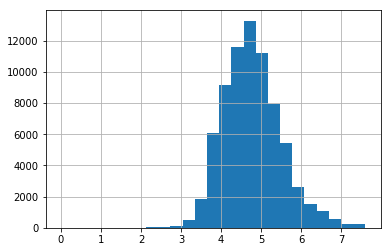

In [212]:
clean_data.log_price.hist(bins=25)

Price appears to be very equally distrubted, with a mean of 4.78. Additionally, the standard deviation is not very large, meaning there is not a ton of variance in the target varaible.

### property_type

In [214]:
clean_data.property_type.unique()

array(['Apartment', 'House', 'Condominium', 'Loft', 'Townhouse', 'Hostel',
       'Guest suite', 'Bed & Breakfast', 'Bungalow', 'Guesthouse', 'Dorm',
       'Other', 'Camper/RV', 'Villa', 'Boutique hotel', 'Timeshare',
       'In-law', 'Boat', 'Serviced apartment', 'Castle', 'Cabin',
       'Treehouse', 'Tipi', 'Vacation home', 'Tent', 'Hut',
       'Casa particular', 'Chalet', 'Yurt', 'Earth House', 'Train',
       'Cave', 'Lighthouse', 'Island'], dtype=object)

In [215]:
result = clean_data[['property_type']].apply(pd.value_counts).fillna(0).T
result.index=['property_type']
result.columns=['Apartment', 'House', 'Condominium', 'Loft', 'Townhouse', 'Hostel', 'Guest suite', 'Bed & Breakfast',
                'Bungalow', 'Guesthouse', 'Dorm', 'Other', 'Camper/RV', 'Villa', 'Boutique hotel', 'Timeshare', 
                'In-law', 'Boat', 'Serviced apartment', 'Castle', 'Cabin', 'Treehouse', 'Tipi', 'Vacation home', 'Tent', 'Hut',
                'Casa particular', 'Chalet', 'Yurt', 'Earth House', 'Train', 'Cave', 'Lighthouse', 'Island']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,Apartment,House,Condominium,Loft,Townhouse,Hostel,Guest suite,Bed & Breakfast,Bungalow,Guesthouse,...,Tent,Hut,Casa particular,Chalet,Yurt,Earth House,Train,Cave,Lighthouse,Island
property_type,48591,16420,2650,1683,1234,600,497,457,365,178,...,8,7,6,4,3,2,2,1,1,1


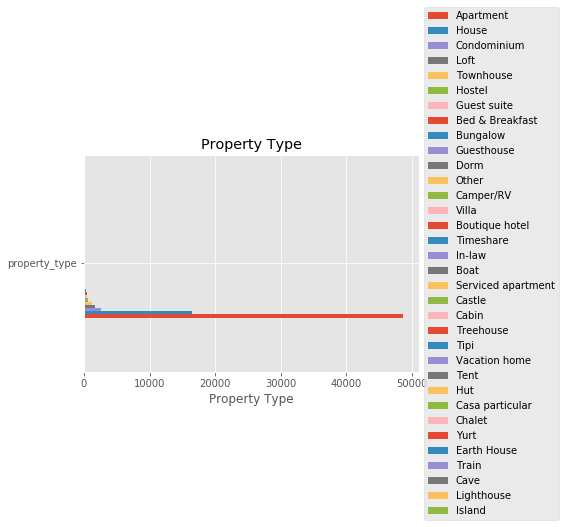

In [216]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# horizontal bar plot
plt=result.plot.barh(title="Property Type")
plt.set_xlabel("Property Type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

From this data, it can be seen that the type of property is unequally weighted towards apartments and houses. There are plenty of other property types, but properties other than houses and apartments make up very little of the data.

### room_type

In [217]:
clean_data.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [218]:
result = clean_data[['room_type']].apply(pd.value_counts).fillna(0).T
result.index=['room_type']
result.columns=['Entire home/apt', 'Private room', 'Shared room']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,Entire home/apt,Private room,Shared room
room_type,41068,30347,2139


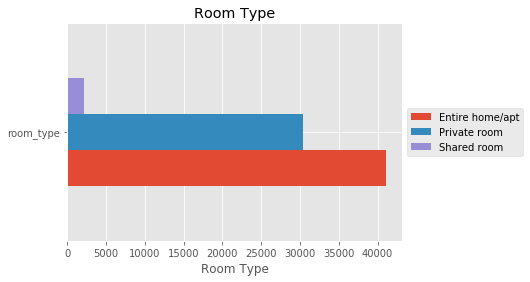

In [219]:
# horizontal bar plot
plt=result.plot.barh(title="Room Type")
plt.set_xlabel("Room Type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

Similar to property type, it can be observed that there are two main room types, which are unequally weighted more than the remaining options. In this case, almost all rooms are either the entire home/apt or a private room. Very rarely is an airbnb a shared room.

### accommodates

In [220]:
clean_data.accommodates.describe()

count   73,554
mean         3
std          2
min          1
25%          2
50%          2
75%          4
max         16
Name: accommodates, dtype: float64

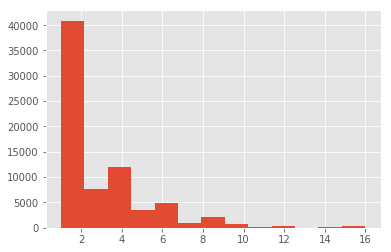

In [226]:
clean_data.accommodates.hist(bins=13)

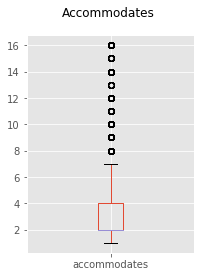

In [233]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(3, 4)
fig.suptitle('Accommodates', fontsize=12)
clean_data.boxplot(column=['accommodates'])

The two plots above illustrate that for various airbnbs, the number of people that can be accomodated is not uniform, and is heavily distrubted near 1-2 people. As the boxplot shows however, there are several outliers where up to 16 are accommodated in a single airbnb.

### bathrooms

In [234]:
clean_data.bathrooms.describe()

count   73,554
mean         1
std          1
min          0
25%          1
50%          1
75%          1
max          8
Name: bathrooms, dtype: float64

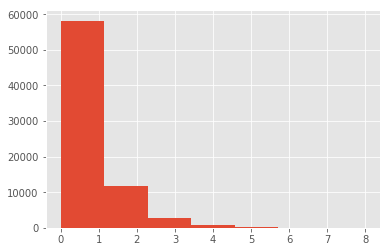

In [238]:
clean_data.bathrooms.hist(bins=7)

As the plot reveals, an overwhelming majority of airbnbs have a single bathroom, with a couple having two bathrooms. It looks to be pretty rare for a airbnb to have more than 2 airbnbs.

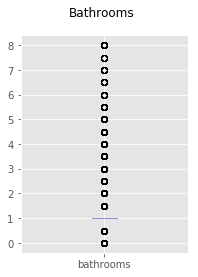

In [239]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(3, 4)
fig.suptitle('Bathrooms', fontsize=12)
clean_data.boxplot(column=['bathrooms'])

The boxplot does not provide much valuable information other than the fact that any number of bathrooms outside of 1 is an outlier, which may be interesting to know for data analysis and results discussion.

### bed_type

In [240]:
clean_data.bed_type.unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Couch', 'Airbed'],
      dtype=object)

In [241]:
result = clean_data[['bed_type']].apply(pd.value_counts).fillna(0).T
result.index=['bed_type']
result.columns=['Real Bed', 'Futon', 'Pull-out Sofa', 'Couch', 'Airbed']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,Real Bed,Futon,Pull-out Sofa,Couch,Airbed
bed_type,71493,744,578,473,266


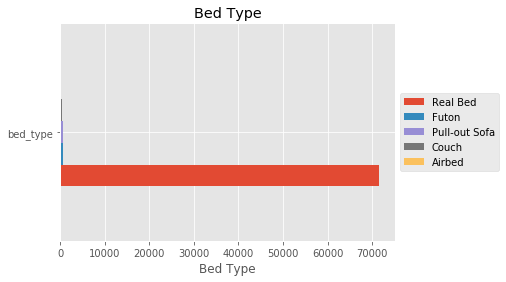

In [242]:
plt=result.plot.barh(title="Bed Type")
plt.set_xlabel("Bed Type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

Similar to many of the other categorical data, there appears to be an uneven distribution of data. Almost all airbnb rooms have a real bed for sleeping, with all the other categories only making up a very small amount of samples relative to the entire data set.

### cancellation_policy

In [243]:
clean_data.cancellation_policy.unique()

array(['strict', 'moderate', 'flexible', 'super_strict_60',
       'super_strict_30'], dtype=object)

In [244]:
result = clean_data[['cancellation_policy']].apply(pd.value_counts).fillna(0).T
result.index=['cancellation_policy']
result.columns=['strict', 'moderate', 'flexible', 'super_strict_60', 'super_strict_30']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,strict,moderate,flexible,super_strict_60,super_strict_30
cancellation_policy,32131,22359,18940,107,17


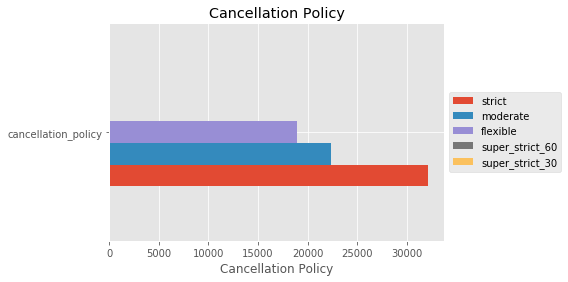

In [246]:
plt=result.plot.barh(title="Cancellation Policy")
plt.set_xlabel("Cancellation Policy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

The visualized data makes it really clear that cancellation policy is made mostly of strict, moderate, and flexible cancellation policies. The super strict 30 and 60 appear to be very unique, and rarely occuring instances. Of the three most common, the data appears to be weighted slightly towards strict, but the distrubtion is much more even than the previous features.

### cleaning_fee

In [247]:
clean_data.cleaning_fee.unique()

array([ True, False])

In [257]:
result = clean_data[['cleaning_fee']].apply(pd.value_counts).fillna(0).T
result.index=['cleaning_fee']
result.columns=['True', 'False']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,True,False
cleaning_fee,54053,19501


Since this feature is binary, it's not very helpful to plot it a bar chart of it, but it appears that most airbnbs charge a cleaning fee. In fact, more than twice the airbnbs charge a cleaning fee than don't.

It might be interesting however, to see what this data looks like plotted against price.

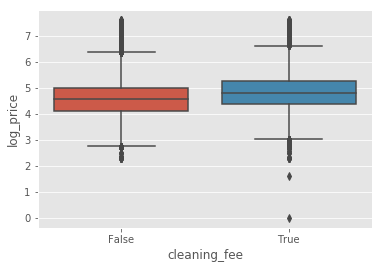

In [267]:
import seaborn as sns

ax = sns.boxplot(x="cleaning_fee", y="log_price", data=clean_data)

From the boxplot, it can be observed that having a cleaning_fee appears to have a very minor impact on the log_price of an airbnb. The mean, first quartile, and third quartile all appear to be slightly higher, with similar boundries for outliers.

### host_has_profile_pic

In [268]:
clean_data.host_has_profile_pic.unique()

array([ True, False])

In [269]:
result = clean_data[['host_has_profile_pic']].apply(pd.value_counts).fillna(0).T
result.index=['host_has_profile_pic']
result.columns=['True', 'False']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,True,False
host_has_profile_pic,73330,224


As clearly illustrated in this table, an overwhelming majority of all hosts have a profile picture set. So many more hosts have profile pictures than those that don't that it may make sense to not use this data feature in a data model. This may be explored in the data modeling.

### host_identity_verified

In [270]:
clean_data.host_identity_verified.unique()

array([ True, False])

In [271]:
result = clean_data[['host_identity_verified']].apply(pd.value_counts).fillna(0).T
result.index=['host_identity_verified']
result.columns=['True', 'False']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,True,False
host_identity_verified,49521,24033


Host identity verified is a binary feature, and interestingly, it appears to have a distribution much more equal than host identity verified. It should be noted however that more than twice the number of hosts have been verified than those who have not however.

### host_response_rate

In [273]:
pd.options.display.float_format = '{:,.3f}'.format

clean_data.host_response_rate.describe()

count   55,540.000
mean         0.944
std          0.163
min          0.000
25%          1.000
50%          1.000
75%          1.000
max          1.000
Name: host_response_rate, dtype: float64

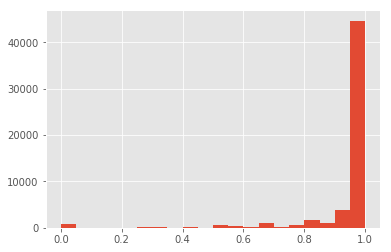

In [274]:
clean_data.host_response_rate.hist(bins=20)

It appears the response rate of airbnb hosts is heavily skewed, with most of the hosts responding 100% of the time.In fact, the mean value of host response rate is 94.4%, with a  standard deviation of 16.3%. Since the data is so skewed, it may be discovered during modeling that this feature may not provide much value for data analysis.

### instant_bookable

In [278]:
clean_data.instant_bookable.unique()

array([False,  True])

In [279]:
result = clean_data[['instant_bookable']].apply(pd.value_counts).fillna(0).T
result.index=['instant_bookable']
result.columns=['True', 'False']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,True,False
instant_bookable,54208,19346


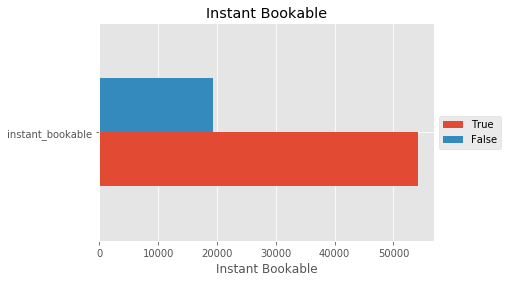

In [280]:
plt=result.plot.barh(title="Instant Bookable")
plt.set_xlabel("Instant Bookable")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

Instant bookable is another binary data type, and it appears that about 3 times as many airbnbs are instantly bookable than those that are not.

### review_scores_rating

In [284]:
pd.options.display.float_format = '{:,.3f}'.format

clean_data.review_scores_rating.describe()

count   56,975.000
mean        94.077
std          7.831
min         20.000
25%         92.000
50%         96.000
75%        100.000
max        100.000
Name: review_scores_rating, dtype: float64

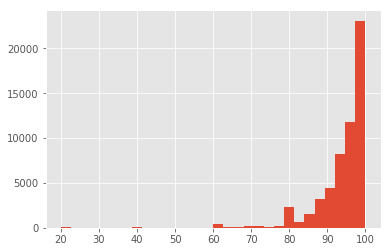

In [286]:
clean_data.review_scores_rating.hist(bins=30)

For review score rating, it appears the the data is skewed in a way that the concentration of review scores are between 90 and 100, with the most at 100. Very few scores are below 90. Such skewed data brings up the possibility that people are just bad at reviewing their stay. In reality, reviews for airbnb should be normally distributed.

### thumbnail_url

In [287]:
clean_data.thumbnail_url.unique()

array([ True, False])

In [288]:
result = clean_data[['thumbnail_url']].apply(pd.value_counts).fillna(0).T
result.index=['thumbnail_url']
result.columns=['True', 'False']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,True,False
thumbnail_url,65418,8136


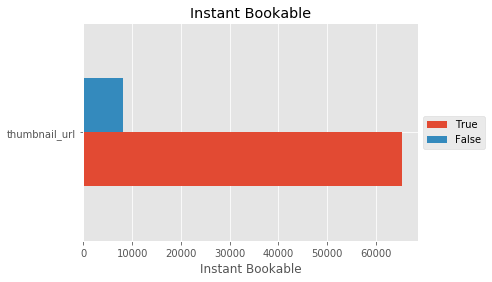

In [289]:
plt=result.plot.barh(title="Instant Bookable")
plt.set_xlabel("Instant Bookable")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

As demonstrated in the preceding table and plot, most hosts have a thumbnail url for their airbnb listing. Only about 10% of all airbnb hosts don't post a thumbnail url for their airbnb. While the data is very skewed, it may still provide valuable insight into the characteristics of particular hosts.

### zipcode

In [290]:
clean_data.zipcode.unique()

array(['11201', '10019', '10027', '94117', '20009', '94131', '90292',
       '90015', '94121', '91748', '10009', '90254', '90277', '90804',
       '60622', '02127', '10002', '11226', '91401', '11212', '11411',
       '90046', '11374', '90028', '10016', '11225', '90036', '90291',
       '90026', '94118', '11211', '60605', '90068', '90057', '10021',
       '20037', '10003', '11237', '11233', '60608', '10001', '94127',
       '91403', '11249', '10037', '10011', '10032', '91106', '94107',
       '20018', '90027', '91601', '20001', '10022', '91201', '90013',
       '11217', '91016', '10031', '10014', '11101', '94110', '94134',
       '91501', '10029', '90230', '90039', '11221', '20019', '60647',
       '20020', '11215', '10025', '10013', '10040', '91604', '10039',
       '10038', '60614', '20002', '11222', '90042', '94114', '20008',
       '11238', '20007', '11206', '91208', '11223', '02130', '02114',
       '94103', '91107', '11355', '11220', '91406', '10036', '10024',
       '90004', '100

In [291]:
result = clean_data[['zipcode']].apply(pd.value_counts).fillna(0).T
result.index=['zipcode']
result.columns=['11201', '10019', '10027', '94117', '20009', '94131', '90292',
       '90015', '94121', '91748', '10009', '90254', '90277', '90804',
       '60622', '02127', '10002', '11226', '91401', '11212', '11411',
       '90046', '11374', '90028', '10016', '11225', '90036', '90291',
       '90026', '94118', '11211', '60605', '90068', '90057', '10021',
       '20037', '10003', '11237', '11233', '60608', '10001', '94127',
       '91403', '11249', '10037', '10011', '10032', '91106', '94107',
       '20018', '90027', '91601', '20001', '10022', '91201', '90013',
       '11217', '91016', '10031', '10014', '11101', '94110', '94134',
       '91501', '10029', '90230', '90039', '11221', '20019', '60647',
       '20020', '11215', '10025', '10013', '10040', '91604', '10039',
       '10038', '60614', '20002', '11222', '90042', '94114', '20008',
       '11238', '20007', '11206', '91208', '11223', '02130', '02114',
       '94103', '91107', '11355', '11220', '91406', '10036', '10024',
       '90004', '10012', '10044', '10023', '10028', '20012', '91205',
       '02132', '60611', '10473', '90019', '94133', '60639', '91423',
       '11232', '11377', '11216', '02129', '91803', '94115', '10128',
       '11207', '11213', '11229', '90064', '90024', '90265', '02134',
       '10314', '02111', '10075', '91605', '91331', '02119', '91384',
       '11385', '10282', '90405', '20010', '90717', '60601', '91505',
       '90012', '90807', '60654', '02120', '10035', '91606', '90703',
       '11218', '90065', '02135', '91607', '11378', '94102', '90018',
       '02113', '90404', '11692', '90403', '90014', '11230', '90302',
       '10065', '60610', '90212', '02215', '02108', '90025', '90038',
       '90247', '90048', '91411', '91040', '94112', '91214', '91325',
       '90802', '20011', '91602', '90731', '94109', '90069', '60660',
       '91202', '11205', '10010', '11209', '02109', '91104', '90007',
       '90029', '02110', '11105', '90272', '60642', '91741', '60613',
       '10034', '10030', '10005', '90016', '10475', '11231', '90077',
       '11103', '90010', '10017', '11102', '11361', '02124', '90047',
       '90250', '60661', '90232', '91745', '60641', '94124', '20003',
       '91335', '02116', '91343', '10455', '91306', '20017', '90505',
       '20016', '11428', '02199', '90045', '10033', '90032', '11370',
       '90266', '90732', '91405', '91765', '11234', '94116', '02118',
       '91711', '60625', '20015', '90713', '10305', '11354', '90803',
       '60657', '11204', '90056', '02152', '02121', '91001', '90814',
       '11372', '60615', '90501', '10466', '90062', '90005', '91702',
       '20005', '90066', '11417', '10004', '90035', '91324', '90006',
       '91007', '10026', '90210', '90034', '11236', '90017', '90290',
       '11412', '10006', '90401', '90020', '91364', '91775', '10468',
       '20024', '90043', '10018', '90031', '20006', '11203', '60645',
       '10301', '90249', '20032', '10304', '91750', '11373', '90260',
       '91105', '91316', '90094', '94122', '94108', '10453', '02125',
       '60618', '11106', '90402', '90041', '11104', '90660', '94123',
       '10457', '11210', '94105', '91101', '90303', '60653', '20036',
       '91008', '11433', '91776', '90305', '10456', '02115', '60644',
       '90746', '02128', '11235', '11421', '10474', '90815', '90008',
       '11367', '10452', '90211', '11419', '91724', '11379', '60607',
       '60637', '91789', '90049', '91302', '60640', '10463', '10306',
       '11434', '11416', '91356', '90293', '60616', '91344', '91754',
       '90301', '10310', '90278', '90745', '11426', '11228', '60612',
       '90275', '11208', '60606', '60646', '91732', '20743', '91311',
       '90033', '90502', '91770', '02136', '91307', '91367', '11369',
       '11109', '20004', '60626', '91350', '10465', '91030', '91352',
       '91042', '91006', '90245', '99135', '11364', '11693', '91326',
       '91203', '11418', '11691', '90808', '60621', '11435', '91381',
       '07306', '11413', '02131', '94143', '90723', '91746', '90704',
       '90220', '94132', '91354', '02467', '11415', '91210', '10460',
       '90037', '91206', '60630', '02122', '10464', '90001', '90813',
       '11224', '91010', '91801', '02145', '91301', '60659', '90248',
       '91361', '90806', '02126', '11436', '60624', '91766', '90631',
       '93551', '91733', '91504', '11214', '91755', '11429', '94014',
       '60634', '11368', '11219', '91304', '90021', '10470', '10471',
       '20712', '91780', '10469', '90503', '90011', '20057', '10462',
       '11360', '02210', '91321', '90810', '11375', '91767', '94164',
       '60602', '60649', '93550', '90058', '90712', '10461', '90504',
       '10451', '60707', '91011', '11365', '10459', '91502', '11414',
       '91790', '94158', '10007', '91791', '11356', '11422', '60609',
       '91506', '90044', '02139', '90280', '94111', '90638', '94104',
       '90063', '91773', '11432', '11358', '94188', '91024', '90710',
       '90602', '60623', '91103', '90059', '90262', '91744', '02150',
       '60619', '90071', '91303', '91355', '91402', '90095', '20064',
       '10280', '90214', '90274', '90706', '10472', '91723', '90755',
       '60629', '91020', '91207', '93543', '91792', '10281', '10312',
       '91390', '60302', '90805', '10454', '20816', '60632', '91387',
       '93535', '60651', '02445', '10458', '91768', '10119', '90603',
       '90023', '20748', '02143', '91731', '91436', '94017', '20219',
       '10069', '10048', '90304', '60628', '90061', '94130', '10467',
       '90604', '91342', '11420', '90650', '91464', '93536', '11427',
       '91204', '60636', '91108', '11580', '91706', '20782', '91362',
       '60638', '91188', '90744', '91740', '90242', '90640', '90201',
       '02163', '20052', '93534', '90003', '93563', '14123', '11694',
       '90601', '92397', '91340', '60631', '60620', '10129', '91308',
       '11366', '90255', '90716', '20268', '02446', '91722', '60656',
       '90605', '92614', '10303', '91523', '90670', '91351', '93532',
       '90715', '60643', '10106', '10302', '90040', '20815', '10000',
       '94129', '02117', '93552', '10118', '90022', '90701', '90241',
       '60652', '11004', '90840', '91345', '91522', '11120', '10550',
       '15074', '20781', '20910', '90067', '10308', '90240', '11357',
       '10270', '90221', '20260', '90002', '91109', '90606', '11362',
       '02107', '92880', '91764', '60617', 'Near ', '93105', '90089',
       '20229', '20540', '20566', '10307', '90306', '11423', '92821',
       '90846', '90630', '11363', '20372', '90222', '60633', '95115',
       '20912', '60805', '91786', '10279', '02138', '10704', '91802',
       '91377', '91708', '90073', '91184', '11509', '11001', '10115',
       '60603', '94401', '02186', '10162', '02458', '02472', '10309',
       '11239']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,11201,10019,10027,94117,20009,94131,90292,90015,94121,91748,...,11001,10115,60603,94401,02186,10162,02458,02472,10309,11239
zipcode,1635,1277,1203,1019,989,985,960,960,929,921,...,1,1,1,1,1,1,1,1,1,1


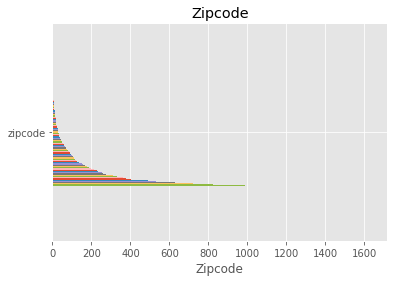

In [294]:
plt=result.plot.barh(title="Zipcode", legend=False)
plt.set_xlabel("Zipcode")
plt

 ### bedrooms

In [296]:
pd.options.display.float_format = '{:,.3f}'.format

clean_data.bedrooms.describe()

count   73,554.000
mean         1.267
std          0.854
min          0.000
25%          1.000
50%          1.000
75%          1.000
max         10.000
Name: bedrooms, dtype: float64

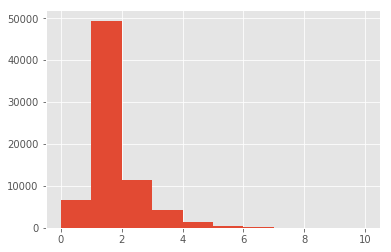

In [301]:
clean_data.bedrooms.hist(bins=10)

### beds

In [302]:
pd.options.display.float_format = '{:,.3f}'.format

clean_data.beds.describe()

count   73,554.000
mean         1.713
std          1.256
min          0.000
25%          1.000
50%          1.000
75%          2.000
max         18.000
Name: beds, dtype: float64

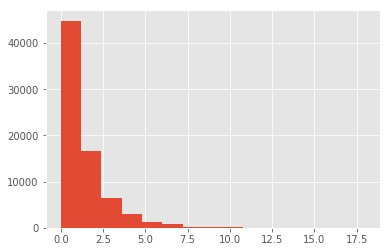

In [304]:
clean_data.beds.hist(bins=15)

### amenities_count

In [305]:
pd.options.display.float_format = '{:,.3f}'.format

clean_data.amenities_count.describe()

count   73,554.000
mean        17.635
std          6.922
min          1.000
25%         13.000
50%         17.000
75%         22.000
max         86.000
Name: amenities_count, dtype: float64

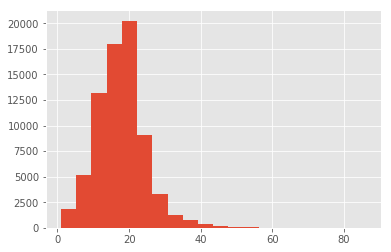

In [309]:
clean_data.amenities_count.hist(bins=20)

### description_length

In [310]:
pd.options.display.float_format = '{:,.3f}'.format

clean_data.description_length.describe()

count   73,554.000
mean       762.780
std        316.960
min          1.000
25%        482.000
50%      1,000.000
75%      1,000.000
max      1,000.000
Name: description_length, dtype: float64

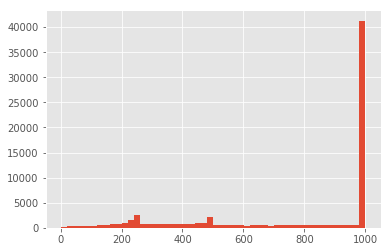

In [315]:
clean_data.description_length.hist(bins=50)

### days_hosted

In [316]:
pd.options.display.float_format = '{:,.3f}'.format

clean_data.days_hosted.describe()

count   73,554.000
mean     1,561.904
std        659.311
min        394.000
25%      1,045.000
50%      1,493.000
75%      2,016.000
max      3,896.000
Name: days_hosted, dtype: float64

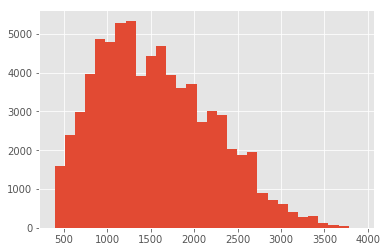

In [325]:
clean_data.days_hosted.hist(bins=30)

# Data Modeling and Prediction

<i>development of a predictive model, regression or
classification. Your model development should include experimentation with feature
selection and hyperparameters. The effect of different features on your target variable, as
well as associations between features should be identified. You should appropriately use
train, validation, and test data when evaluating your models.</i>

# Results Analysis

<i>Summary of your interpretation of the results. Are the results
statistically significant? I.e., did you prove or disprove your hypothesis. How could you
improve your analysis? Lessons learned, and feedback on the assignment.</i>